In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
51,52,Male,32,Engineer,7.5,8,45,3,Normal,120/80,70,8000,None
316,317,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,None
226,227,Female,44,Teacher,6.6,7,45,4,Overweight,135/90,65,6000,Insomnia
83,84,Male,35,Teacher,6.7,7,40,5,Overweight,128/84,70,5600,None
304,305,Female,51,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
293,294,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
84,85,Male,35,Software Engineer,7.5,8,60,5,Normal Weight,120/80,70,8000,None
107,108,Male,37,Engineer,7.8,8,70,4,Normal Weight,120/80,68,7000,None


In [3]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [6]:
data.shape

(374, 13)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

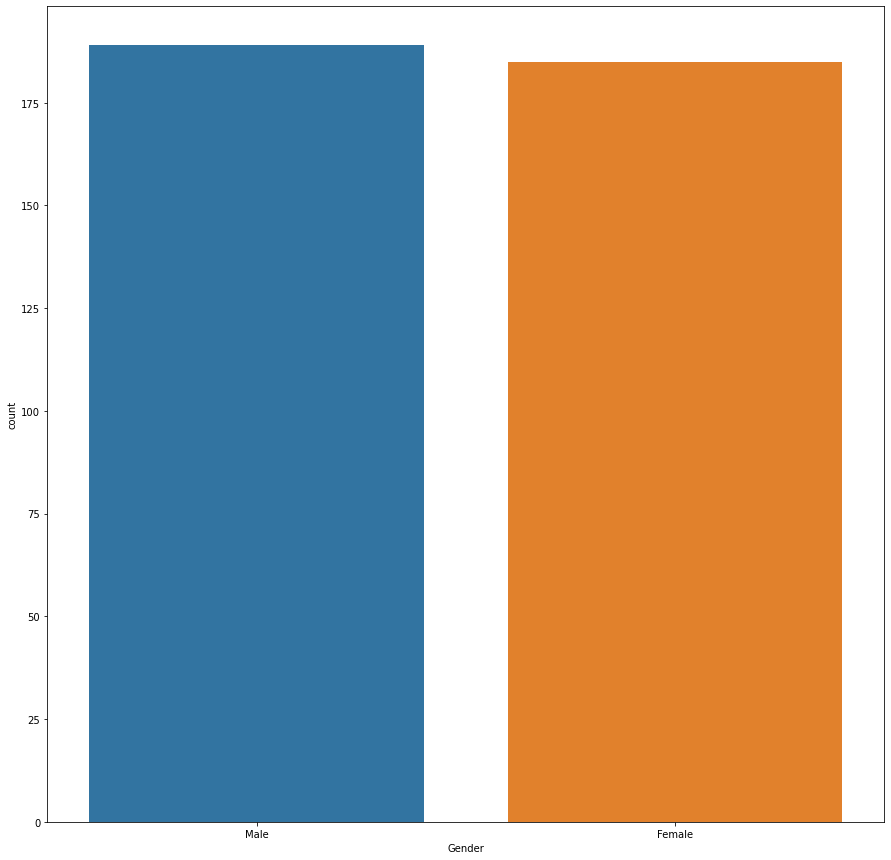

In [7]:
plt.figure(figsize=(15,15))
sns.countplot(data['Gender'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

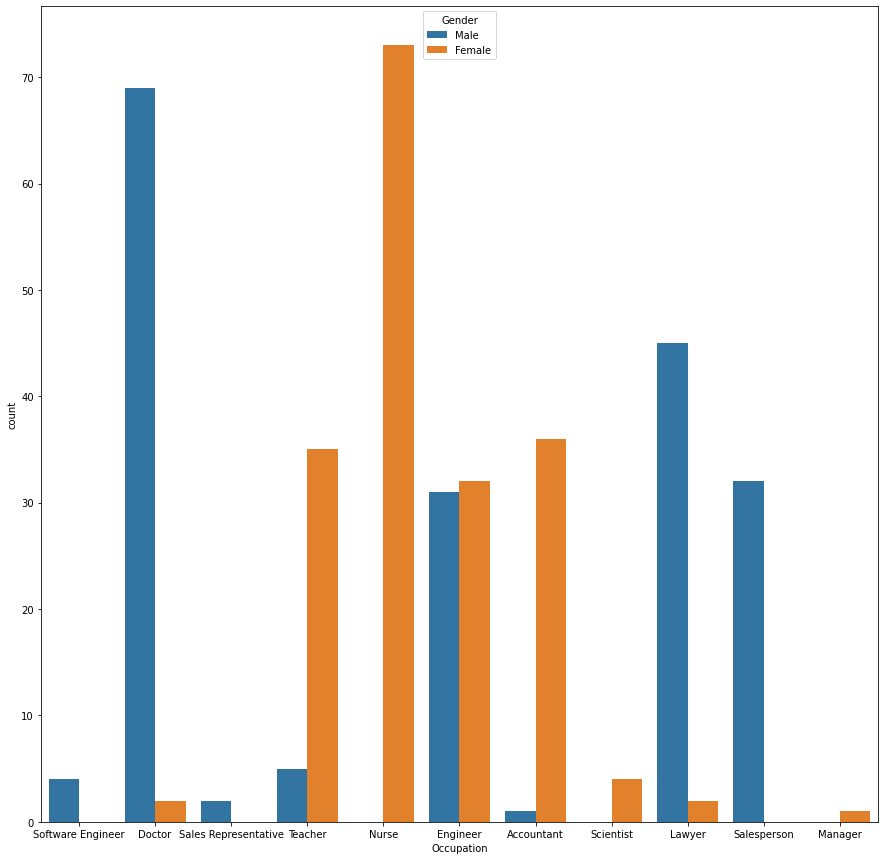

In [8]:
plt.figure(figsize=(15,15))
sns.countplot(data=data, x='Occupation', hue='Gender')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

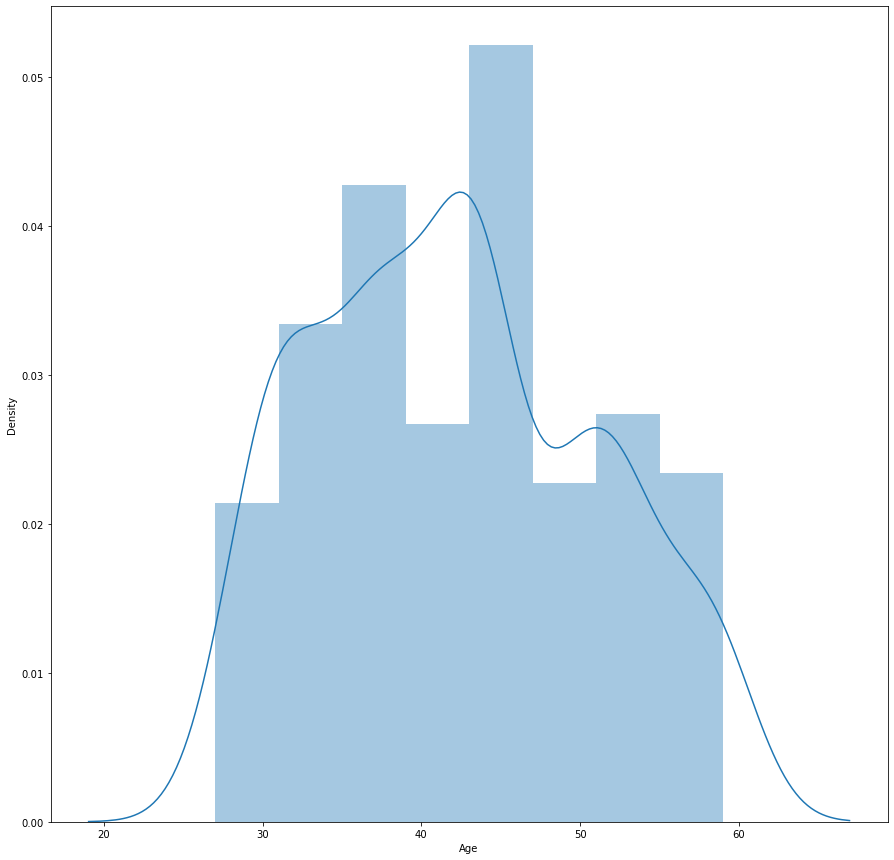

In [9]:
plt.figure(figsize=(15,15))
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Sleep Duration', ylabel='Count'>

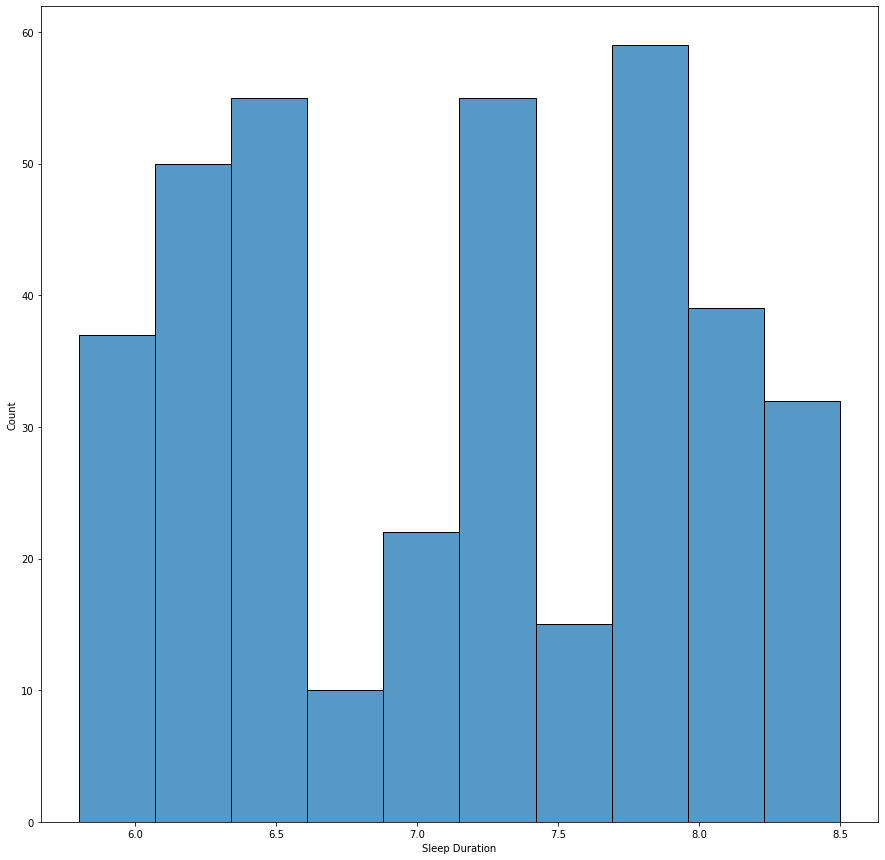

In [10]:
plt.figure(figsize=(15,15))
sns.histplot(data=data, x='Sleep Duration')

<AxesSubplot:xlabel='Sleep Duration', ylabel='Occupation'>

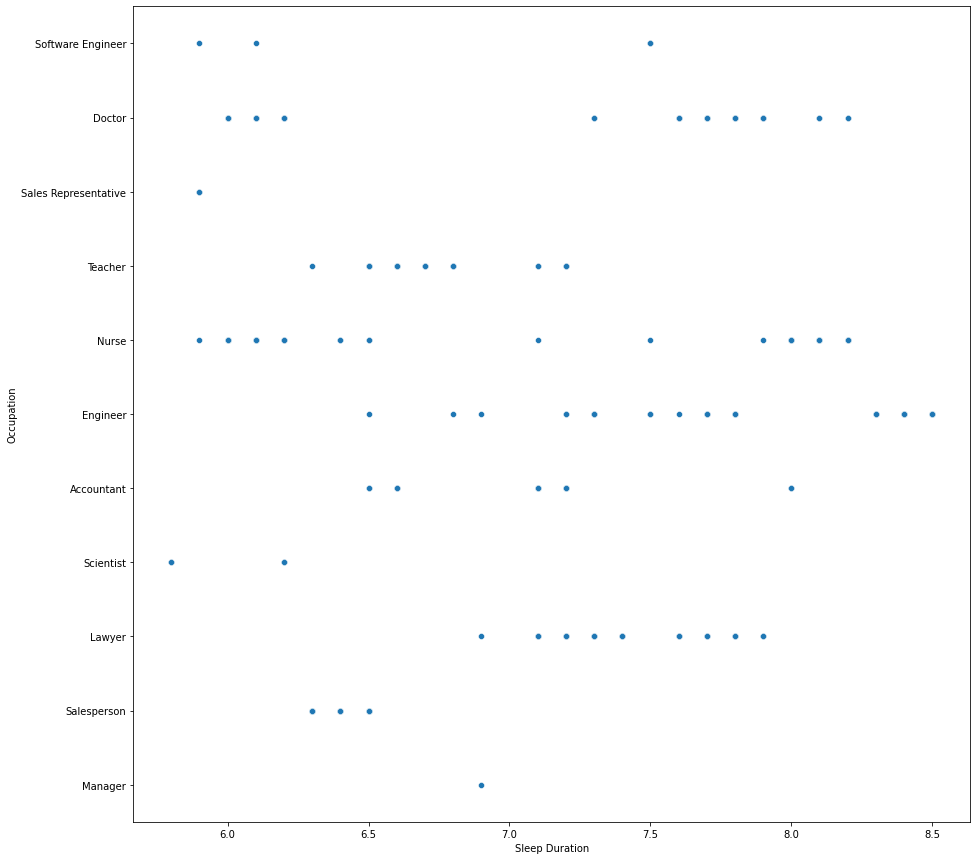

In [11]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=data, x='Sleep Duration', y='Occupation')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.4% of the points cann

<Figure size 1080x1080 with 0 Axes>

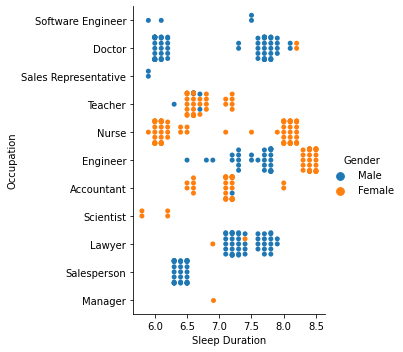

In [12]:
plt.figure(figsize=(15,15))
sns.catplot(data=data, x='Sleep Duration', y='Occupation', kind='swarm', hue='Gender')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cann

<Figure size 1080x1080 with 0 Axes>

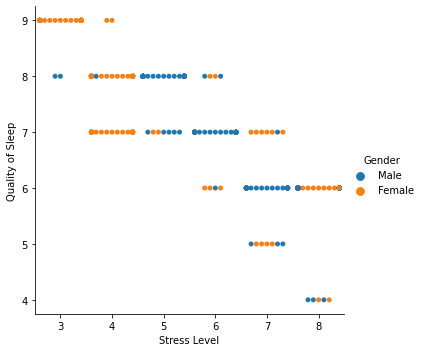

In [13]:
plt.figure(figsize=(15,15))
sns.catplot(data=data, y='Quality of Sleep', x='Stress Level', hue='Gender', kind='swarm')

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

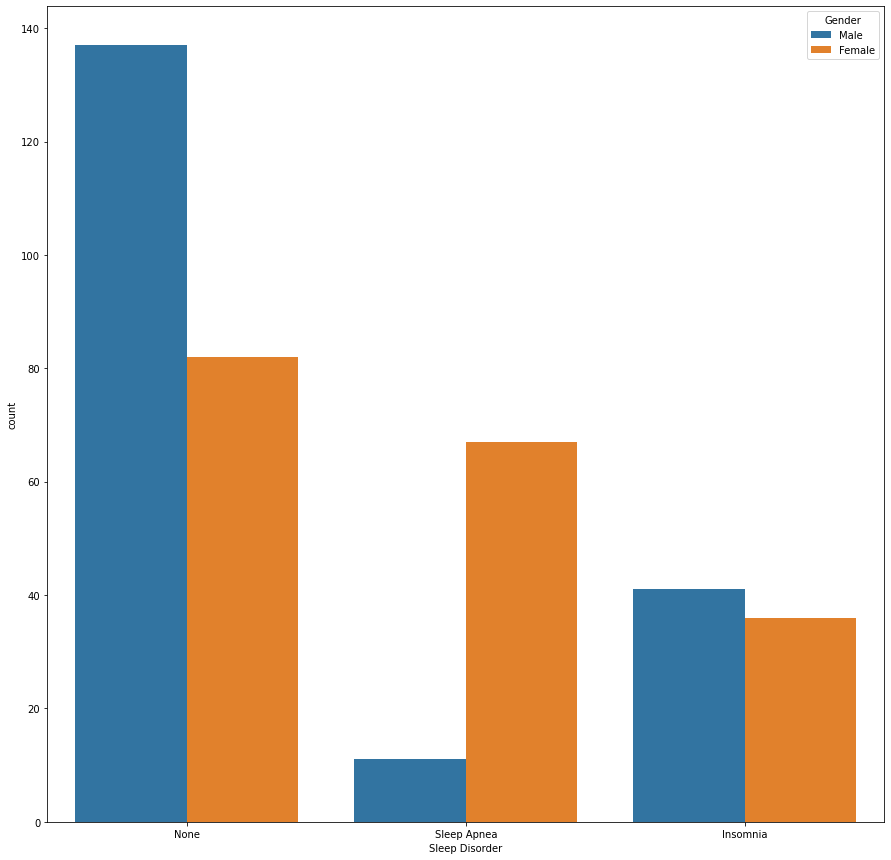

In [14]:
plt.figure(figsize=(15,15))
sns.countplot(data=data, x='Sleep Disorder', hue='Gender')

<Figure size 3600x3600 with 0 Axes>

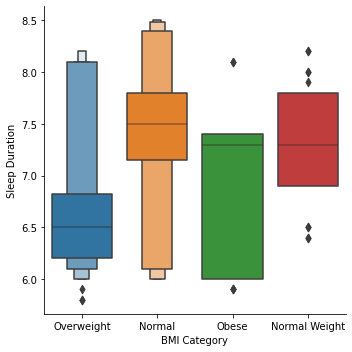

In [15]:
plt.figure(figsize=(50,50))
sns.catplot(data=data, x='BMI Category', y='Sleep Duration', kind='boxen')
plt.show()

<AxesSubplot:>

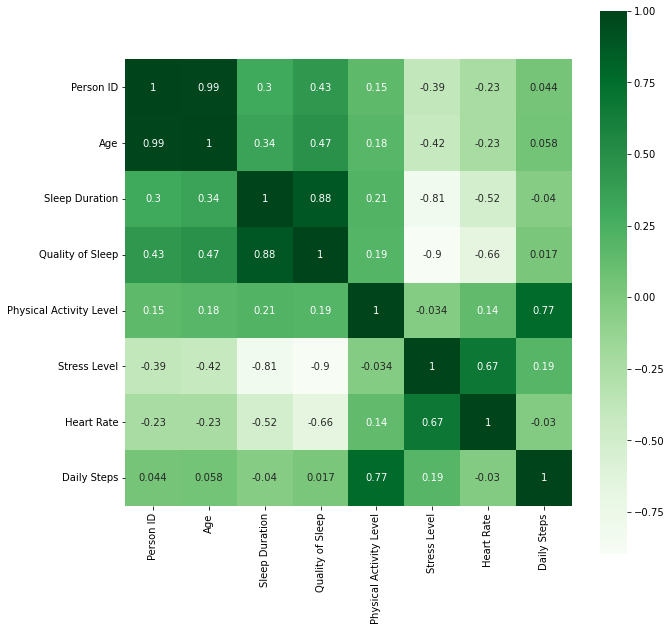

In [16]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, annot=True, cmap='Greens', annot_kws={'size':10})

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [18]:
data.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [19]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Occupation'] = le.fit_transform(data['Occupation'])
data['BMI Category'] = le.fit_transform(data['BMI Category'])
data['Blood Pressure'] = le.fit_transform(data['Blood Pressure'])
data['Sleep Disorder'] = le.fit_transform(data['Sleep Disorder'])

In [20]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,11,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,9,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,4,1,28,6,5.9,4,30,8,2,22,85,3000,2
4,5,1,28,6,5.9,4,30,8,2,22,85,3000,2


In [21]:
# Splitting data into target and feature columns
x = data.drop(['Quality of Sleep','Person ID'], axis=1)
y = data['Quality of Sleep']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [23]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=[100,100,100], solver='lbfgs', max_iter=1000, alpha=1)

In [44]:
mlp.fit(x_train_scaled,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1, hidden_layer_sizes=[100, 100, 100], max_iter=1000,
              random_state=0, solver='lbfgs')

In [38]:
from sklearn.metrics import accuracy_score

In [45]:
prediction = mlp.predict(x_train_scaled)
score = accuracy_score(prediction, y_train)
print(score)

1.0


In [46]:
prediction = mlp.predict(x_test_scaled)
score = accuracy_score(prediction, y_test)
print(score)

0.9866666666666667
